In [ ]:
import pandas as pd
import numpy as np
from math import sqrt

from sklearn.model_selection import cross_validate,KFold,train_test_split
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing,datasets

import matplotlib.pyplot as plt

In [4]:
bank = pd.read_csv("Universalbank.csv")

In [62]:
df = pd.DataFrame(bank, columns = ['Age' 'Experience' 'Income' 'Family' 'CCAvg' 'Education' 
                                   'Mortgage' 'Personal Loan' 'Securities Account' 'CD Account'
                                   'Online' 'CreditCard'])

In [63]:
df["bank"] = df.index.values * 5000

In [64]:
scaler = StandardScaler()

In [65]:
scaler.fit(bank.drop('Personal Loan', axis=1))

StandardScaler()

In [66]:
sf = scaler.transform(bank.drop('Personal Loan', axis=1))

In [67]:
print(bank.shape)

(5000, 14)


In [68]:
bank_ft = pd.DataFrame(sf, columns=bank.columns[:13])

In [69]:
X_train, X_test, y_train, y_test = train_test_split(sf, bank['Personal Loan'], test_size=.4)

In [70]:
knn = KNeighborsClassifier(n_neighbors=1)

In [71]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [72]:
pred = knn.predict(X_test)

In [73]:
print(knn.predict(X_test))

[0 0 0 ... 0 0 0]


In [74]:
print(confusion_matrix(y_test,pred))

[[1765   31]
 [  85  119]]


In [75]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1796
           1       0.79      0.58      0.67       204

    accuracy                           0.94      2000
   macro avg       0.87      0.78      0.82      2000
weighted avg       0.94      0.94      0.94      2000



In [76]:
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'Error Rate')

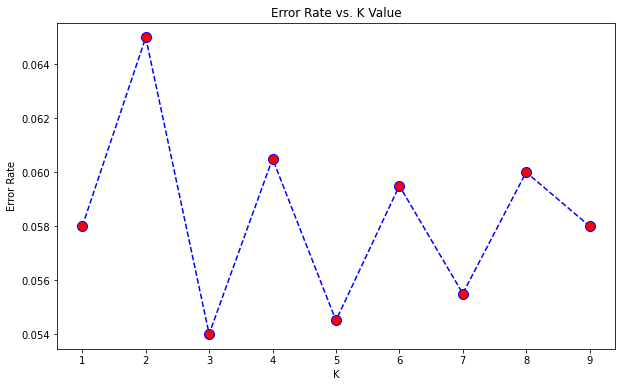

In [77]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [87]:
example = np.array([0, 40, 10, 84, 0, 2, 2, 2, 0, 0, 0, 1, 1]) #test data from worksheet ('Age': 40, 'Experience': 10, 'Income': 84, 'Family': 2, 
                                                               #'CCAvg': 2, 'Education': 2, 'Mortgage': 0, 'Securities Account': 0, 'CD Account': 0,
                                                               #'Online': 1, Credit Card': 1)

In [88]:
example = example.reshape(1, -1)

In [104]:
prediction = knn.predict(example)
if prediction > .5:
        print("Accept")


Accept


In [107]:
example = example.reshape(len(example), -1)

In [108]:
print(prediction)

[1]


In [119]:
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(example)
    error_rate.append(np.mean(pred_i !=example))

Text(0, 0.5, 'Error Rate')

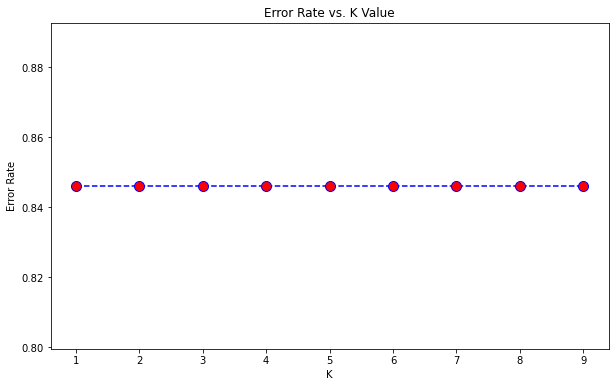

In [120]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [121]:
print(confusion_matrix(example,pred))

ValueError: Found input variables with inconsistent numbers of samples: [1, 2000]